# <span style="color:red"> Problem: Dataset of one feature and one output is given. Predict the line that best fit the dataset.</span>

# <span style="color:red">Dataset preparation</span>

In [174]:
# ! pip install torch
import torch
import matplotlib.pyplot as plt

Do you know what is **tensor**?</br>

In PyTorch, a "tensor" is a fundamental data structure used to represent multi-dimensional arrays, similar to NumPy arrays. Tensors are a key building block for creating and working with neural networks and other machine learning models. They can be thought of as the basic units of data in PyTorch.

Here are some important characteristics and features of PyTorch tensors:

- **Multi-Dimensional Arrays**: Tensors can have any number of dimensions, making them suitable for various types of data, from scalars (0-dimensional) to images, videos, and more complex data (with multiple dimensions).
- **Data Types**: Tensors can hold data of different types, such as float, integer, or boolean. You can specify the data type when creating a tensor.
- **GPU Support**: PyTorch provides GPU support, so you can perform computations on tensors using the power of GPUs, which can significantly speed up deep learning operations.
- **Automatic Differentiation**: PyTorch can automatically compute gradients of tensors, making it particularly useful for implementing and training neural networks using gradient-based optimization algorithms like backpropagation.
- **Operations**: PyTorch provides a wide range of operations and functions for tensor manipulation, including element-wise operations, matrix operations, and more complex operations for deep learning.

In [175]:
#Making Dataset
x = torch.arange(-100, 100, dtype=torch.float32) # Creates a one-dimensional tensor of size 200
y = 5*x + 1
# Adding Random Noise
noise = torch.rand(y.shape, dtype=torch.float32)*10
y = y + noise

In [176]:
# #Changing Shape of x and y accrodingly
# print(x.shape[0], y.shape[0])
# x = x.view(10, -1)
# y = y.view(10, -1)
# print(x.shape, y.shape)

In [177]:
DS = {'X': x, 'Y': y}

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset


In [178]:
from torch.utils.data.dataset import Dataset

# Define a custom dataset class that inherits from the PyTorch Dataset class.
class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        # Constructor: Initialize the dataset with input data and target data.
        self.x = x  # Input data
        self.y = y  # Target data (labels)
        
    def __getitem__(self, index):
        # Method to get an item from the dataset at a specific index.
        return self.x[index], self.y[index]

    def __len__(self):
        # Method to get the length of the dataset.
        return len(self.x)


In [179]:
dataset = MyCustomDataset(DS['X'], DS['Y'])
# dataset.__getitem__(34)

## DataLoader
A data loader in PyTorch is a utility that helps efficiently load and manage your dataset for training machine learning models. It handles tasks like dividing your data into batches, shuffling the data for randomness, and making it easier to iterate over your dataset during training. Data loaders are especially useful when dealing with large datasets, as they improve training performance and manage data flow seamlessly.

In [180]:
from torch.utils.data import DataLoader

# Set the batch size, which determines how many data samples are processed at once during training.
batch_size = 32

# Create a DataLoader to manage the dataset for training.
# - 'dataset' should be replaced with your actual dataset, such as MyCustomDataset.
# - 'batch_size' sets the number of data samples to process in each batch.
# - 'shuffle=True' means that the data will be shuffled randomly before each epoch for better training.

# Create a DataLoader object:
train_loader = DataLoader(dataset, batch_size, shuffle=True)


# Model

In [181]:
class linear_regression(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        # Call the constructor of the parent class (torch.nn.Module).
        super(linear_regression, self).__init__()
        
        # Create a linear layer that performs the linear transformation.
        # - input_size: Number of input features.
        # - output_size: Number of output predictions.
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        # 'x' is the input data.
        
        # Pass the input data through the linear layer to perform the linear transformation.
        # The linear layer has parameters (weights and biases) that the model learns during training.
        return self.linear(x)

model = linear_regression(input_size=1, output_size=1)

# Loss

In [182]:
# Create a mean squared error (MSE) loss function for model evaluation.
# MSE measures the average squared difference between the model's predictions and the actual target values.

# Initialize the MSE loss function and assign it to the 'criterion' variable.
criterion = torch.nn.MSELoss()

# Optimizer
An optimizer is a critical component in training machine learning models, particularly in deep learning. Its main purpose is to adjust the model's parameters (weights and biases) during the training process in order to minimize a chosen loss function. The optimizer uses a specific optimization algorithm to determine how much to update the model's parameters to make the model perform better on the given task. The choice of optimizer and its hyperparameters can significantly impact the training process and the final performance of the model.

In the code we provided, you are using the Stochastic Gradient Descent (SGD) optimizer from the PyTorch library to optimize the parameters of a deep learning model.

In [183]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

# Visualize Before Training


In [184]:
def plot_actual_vs_predicted(DS, model, actual_color='red', predicted_color='green', textgiven=""):
    """
    Plot actual data and model predictions.
    
    Args:
        DS (dict): A dictionary containing 'X' (input data) and 'Y' (actual data).
        model: A trained PyTorch model.
        actual_color (str): The color for plotting actual data (default: 'red').
        predicted_color (str): The color for plotting model predictions (default: 'green').
    """
    
    with torch.no_grad():
        # Make predictions using the model
        y_pred = model(DS['X'].unsqueeze(1))
        
    x_values = DS['X'].view(-1).numpy()
    y_actual = DS['Y'].view(-1).numpy()
    
    plt.plot(x_values, y_actual, actual_color, label='Actual')
    plt.plot(x_values, y_pred.view(-1).numpy(), predicted_color, label='Predicted')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(textgiven)
    plt.show()

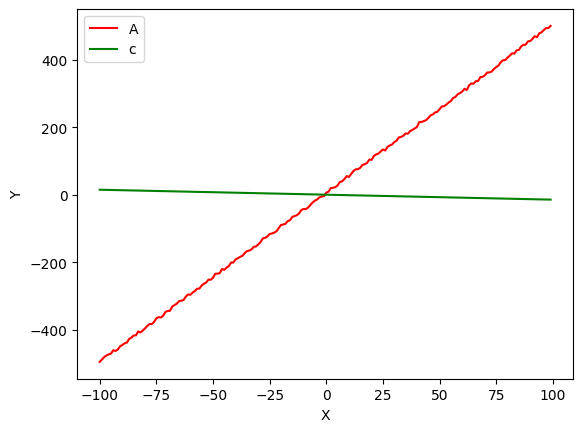

In [185]:

plot_actual_vs_predicted(DS, model, actual_color='red', predicted_color='green', textgiven='Actual vs Predicted Before Training')

# Training 
Training a deep learning model involves a series of steps that aim to optimize the model's parameters (weights and biases) to make accurate predictions on a given task. Here are the essential training steps in deep learning:

- Data Preparation:
Collect and preprocess the dataset: This includes data cleaning, normalization, and splitting into training, validation, and test sets.
- Data augmentation (optional): For image data, you can apply transformations like rotation, flipping, and cropping to increase the diversity of the training data.
Model Architecture:
- Define the neural network architecture: Design the structure of the model, including the number of layers, type of layers, and the number of neurons in each layer.
- Choose activation functions: Select appropriate activation functions for each layer to introduce non-linearity into the model.
Loss Function:
- Choose an appropriate loss function: The loss function quantifies how well the model's predictions match the true target values. The choice of loss function depends on the problem type (e.g., regression, classification) and the specific objectives of the task.
Optimizer:
- Select an optimization algorithm: Common optimizers include stochastic gradient descent (SGD), Adam, RMSprop, and more. The optimizer updates the model's parameters during training to minimize the loss.
- Training Loop:
    - Iterate over epochs: An epoch is one complete pass through the entire training dataset.
    - Mini-batch processing: Instead of using the entire dataset in each iteration, use mini-batches of data. This reduces memory requirements and speeds up training.
    - Forward Pass: Feed a batch of data through the model to obtain predictions.
    - Compute Loss: Calculate the loss between the model's predictions and the actual target values.
    - Backpropagation: Compute gradients of the loss with respect to the model's parameters using backpropagation.
    - Parameter Update: Use the optimizer to update the model's parameters in the direction that reduces the loss.
- Validation:
Periodically assess the model's performance on a validation dataset (not used for training) to monitor overfitting.
- Adjust hyperparameters: Based on validation results, fine-tune hyperparameters such as learning rate, batch size, and model architecture.
Early Stopping:
- Implement early stopping: If the model's performance on the validation set stops improving or starts degrading, stop training to prevent overfitting.
- Testing:
Evaluate the trained model on a separate test dataset to assess its performance on unseen data.
- Deployment:
Deploy the model for real-world applications, which may involve integrating it into an application or system.
- Regularization (optional):
Apply regularization techniques like L1 or L2 regularization, dropout, or batch normalization to prevent overfitting and improve generalization.
- Hyperparameter Tuning (optional):
Experiment with different hyperparameters, architectures, and optimization strategies to find the best combination for your specific task.
- Monitoring and Maintenance:
Continuously monitor the model's performance in a production environment and retrain or update the model as necessary to adapt to changing data patterns or requirements.


In [186]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    LOSS = []  # List to store loss values for each epoch

    for epoch in range(num_epochs):
        total_loss = 0.0  # Variable to accumulate the loss for this epoch

        for batch in train_loader:
            x, y = batch

            # Forward pass
            y_hat = model(x.unsqueeze(1))

            # Calculate the loss
            loss = criterion(y_hat, y.unsqueeze(1))

            # Backpropagation and parameter update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        epoch_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch} loss: {epoch_loss:.4f}")

        LOSS.append(epoch_loss)

    return LOSS

Epoch 0 loss: 88301.6417
Epoch 1 loss: 90591.3850
Epoch 2 loss: 84399.8460
Epoch 3 loss: 86205.5335
Epoch 4 loss: 86785.8047
Epoch 5 loss: 81806.7706
Epoch 6 loss: 81774.5156
Epoch 7 loss: 80548.1244
Epoch 8 loss: 82437.0061
Epoch 9 loss: 79763.1674
Epoch 10 loss: 76782.3616
Epoch 11 loss: 81807.5413
Epoch 12 loss: 78749.5419
Epoch 13 loss: 76874.5692
Epoch 14 loss: 76751.8795
Epoch 15 loss: 77033.4983
Epoch 16 loss: 77406.5636
Epoch 17 loss: 71645.0391
Epoch 18 loss: 70831.8527
Epoch 19 loss: 75175.7796
Epoch 20 loss: 72837.2840
Epoch 21 loss: 68380.1786
Epoch 22 loss: 70964.2612
Epoch 23 loss: 73823.3990
Epoch 24 loss: 69546.0073
Epoch 25 loss: 71111.4732
Epoch 26 loss: 65678.5547
Epoch 27 loss: 72773.3839
Epoch 28 loss: 70340.6110
Epoch 29 loss: 68919.4169
Epoch 30 loss: 65071.7835
Epoch 31 loss: 68365.4637
Epoch 32 loss: 69635.3220
Epoch 33 loss: 60025.3351
Epoch 34 loss: 62493.2907
Epoch 35 loss: 60917.5904
Epoch 36 loss: 60716.9939
Epoch 37 loss: 58865.5017
Epoch 38 loss: 62049.2

Epoch 53 loss: 56129.7734
Epoch 54 loss: 56259.7617
Epoch 55 loss: 53295.4286
Epoch 56 loss: 51097.0921
Epoch 57 loss: 52619.8560
Epoch 58 loss: 48712.3937
Epoch 59 loss: 52279.1484
Epoch 60 loss: 52337.5709
Epoch 61 loss: 52600.6713
Epoch 62 loss: 49471.5725
Epoch 63 loss: 46748.0720
Epoch 64 loss: 46692.3943
Epoch 65 loss: 45755.0307
Epoch 66 loss: 48365.0206
Epoch 67 loss: 46318.6317
Epoch 68 loss: 47844.4621
Epoch 69 loss: 45343.6032
Epoch 70 loss: 43849.6403
Epoch 71 loss: 44729.1345
Epoch 72 loss: 45488.4051
Epoch 73 loss: 45429.4648
Epoch 74 loss: 44761.0765
Epoch 75 loss: 43289.0742
Epoch 76 loss: 44665.1897
Epoch 77 loss: 43764.7891
Epoch 78 loss: 44615.2857
Epoch 79 loss: 45764.8343
Epoch 80 loss: 41467.8761
Epoch 81 loss: 41820.4367
Epoch 82 loss: 43457.8161
Epoch 83 loss: 38308.0566
Epoch 84 loss: 39912.6853
Epoch 85 loss: 37621.5435
Epoch 86 loss: 38611.9699
Epoch 87 loss: 38992.2659
Epoch 88 loss: 38358.2254
Epoch 89 loss: 38371.8968
Epoch 90 loss: 37966.7511
Epoch 91 los

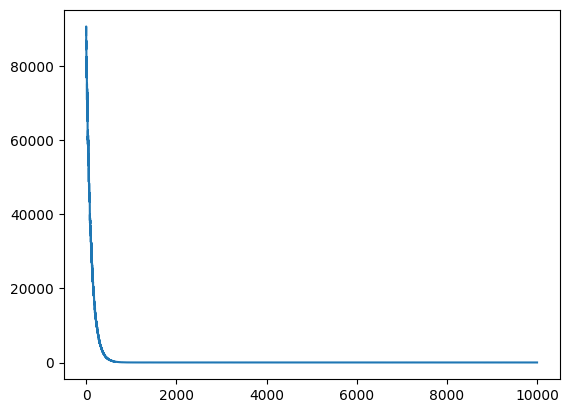

In [187]:
losses = train_model(model, train_loader, criterion, optimizer, num_epochs=10000)
plt.plot(losses) # Plot the loss curve

# Visualize After Training

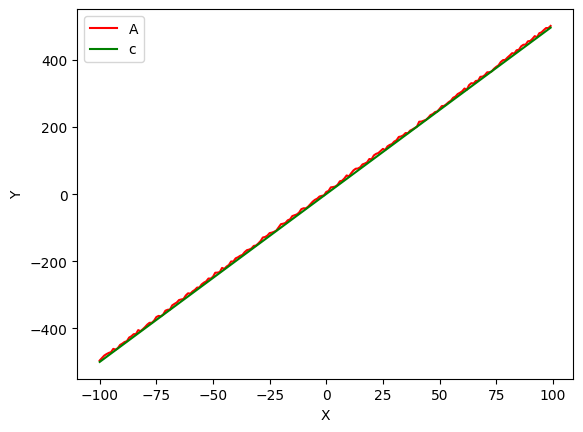

In [188]:

plot_actual_vs_predicted(DS, model, actual_color='red', predicted_color='green', textgiven='Actual vs Predicted Before Training')